In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load data
data = pd.read_csv('/Users/antonfreidin/Airbnb_pricing_ML/tabular_data/clean_tabular_data.csv', index_col=0)



In [3]:
data.describe()

,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2.396629,1.365169,152.368539,5.071573,4.903146,4.932022,4.903596,4.943146,4.764157,34.733371
std,1.827484,0.821752,127.198158,6.543922,0.135121,0.122210,0.121337,0.103609,0.181936,14.465732
min,1.000000,0.000000,3.000000,3.800000,4.000000,3.900000,4.000000,3.900000,3.300000,3.000000
25%,1.000000,1.000000,83.000000,4.800000,4.900000,4.900000,4.900000,4.900000,4.700000,24.000000
50%,2.000000,1.000000,119.000000,4.900000,4.900000,5.000000,4.900000,5.000000,4.800000,34.000000
75%,3.000000,1.500000,175.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,44.000000
max,17.000000,10.000000,1132.000000,200.000000,5.000000,5.000000,5.000000,5.000000,5.000000,84.000000


## Observations

- Dataset is very small, predictive capablities won't be great on this size
- 200 rating on cleanliness is an error, should be replaced with 5
- Large standard deviation of the target: nightly price
- the standard deviations of ratings are very limited
- Nightly price is right skewed


Skewness of price: 3.143242109187824


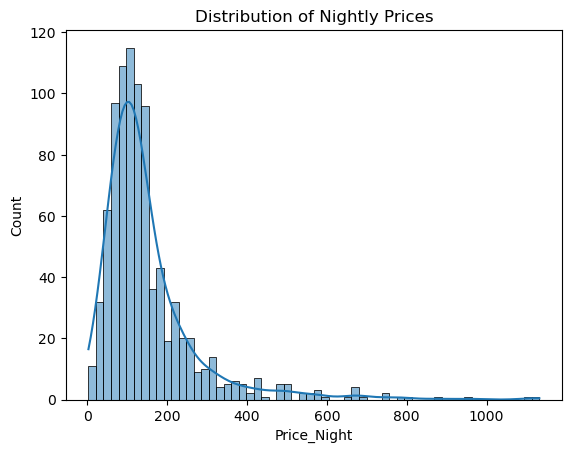

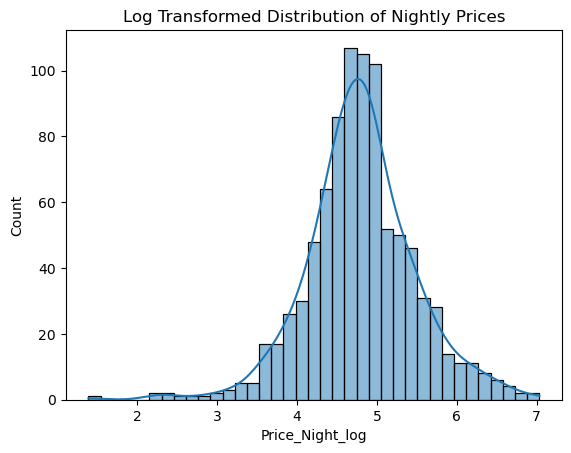

In [4]:

print("Skewness of price:", data['Price_Night'].skew())


sns.histplot(data['Price_Night'], kde=True)
plt.title('Distribution of Nightly Prices')
plt.show()

# If skewed, apply transformation
if data['Price_Night'].skew() > 1:
    data['Price_Night_log'] = np.log(data['Price_Night'] + 1)
    sns.histplot(data['Price_Night_log'], kde=True)
    plt.title('Log Transformed Distribution of Nightly Prices')
    plt.show()



Predictive Value of Ratings with Limited Range
The limited range of ratings, especially when coupled with low variability (as seen from low standard deviations), might suggest that these features could have limited predictive value. This observation is primarily based on a few key points:

Low Variance: Features with low variance (i.e., most values are close to each other) provide limited information for differentiating between observations in the dataset. If almost every listing has a high rating, it's hard for the model to use this feature to differentiate between a more expensive and a less expensive listing effectively.
Ceiling Effect: If many ratings are close to the maximum (e.g., 5 for cleanliness, accuracy, etc.), it might indicate a ceiling effect, where improvements in quality that might affect prices are not captured because the ratings are already maxed out.
Relevance: Ratings might reflect qualities that do not significantly impact pricing decisions directly. For instance, all properties in a high-demand area might have high location ratings regardless of price variations due to other factors.
Despite these potential limitations, ratings shouldn't be outright discarded without further analysis. They might interact with other features (like location, number of bedrooms, or amenities) in non-linear ways that could influence pricing. For instance, a combination of high ratings across all categories could justify a premium in pricing, especially in competitive markets.

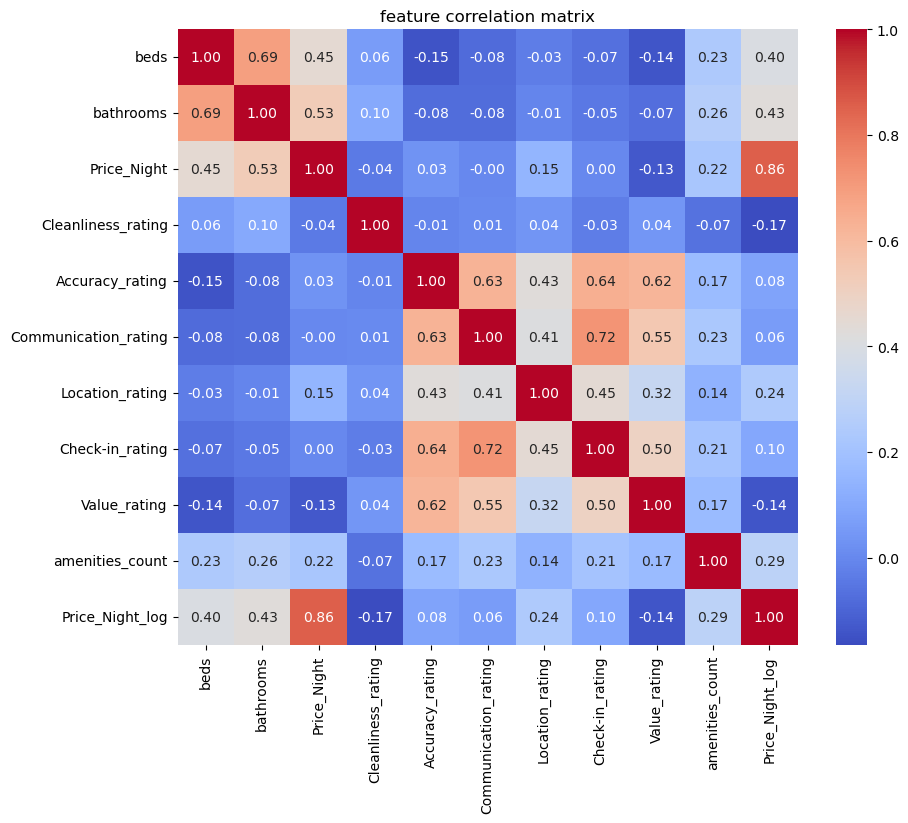

In [5]:
numeric_data = data.select_dtypes(include=np.number)
corr = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f", cmap='coolwarm')
plt.title('feature correlation matrix')
plt.show()

In [6]:
corr

,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,Price_Night_log
beds,1.000000,0.690685,0.450756,0.060729,-0.146274,-0.082117,-0.031803,-0.069690,-0.142931,0.234960,0.402044
bathrooms,0.690685,1.000000,0.527746,0.103897,-0.079246,-0.076248,-0.010362,-0.046538,-0.071485,0.258262,0.428531
Price_Night,0.450756,0.527746,1.000000,-0.038948,0.033487,-0.001751,0.145716,0.000755,-0.132893,0.218317,0.856109
Cleanliness_rating,0.060729,0.103897,-0.038948,1.000000,-0.007519,0.005683,0.035375,-0.031569,0.039042,-0.065074,-0.165994
Accuracy_rating,-0.146274,-0.079246,0.033487,-0.007519,1.000000,0.630125,0.426742,0.641116,0.620020,0.171538,0.080568
Communication_rating,-0.082117,-0.076248,-0.001751,0.005683,0.630125,1.000000,0.409444,0.724057,0.546966,0.226199,0.058773
Location_rating,-0.031803,-0.010362,0.145716,0.035375,0.426742,0.409444,1.000000,0.448450,0.321764,0.138633,0.240628
Check-in_rating,-0.069690,-0.046538,0.000755,-0.031569,0.641116,0.724057,0.448450,1.000000,0.495671,0.206519,0.096711
Value_rating,-0.142931,-0.071485,-0.132893,0.039042,0.620020,0.546966,0.321764,0.495671,1.000000,0.168767,-0.139359
amenities_count,0.234960,0.258262,0.218317,-0.065074,0.171538,0.226199,0.138633,0.206519,0.168767,1.000000,0.287998


## Observations from Heatmap

-Bedrooms and bathrooms have a correlation of 0.69
- Bedrooms and bathroomns have moderate positive correlatons with the target nightly price
- Most ratings have a low to moderate correlation between each other, suggesting a degree of overlap 
- Most concerning is Accuracy, Communication, Check-in, and Value Ratings: they exhibit strong intercorrelations from 0.546 to 0.724 in range - suggesting multicollinearity
- The ratings are weakly correlated with price. Indicating that ratings (taken individually), have weak effects on price
- Amenities count has a moderate positive correlation r= 0.22 with price


## Feature Engineering

- Include number of bedrooms, bathrooms and amenities count as features
- As for the ratings, these will have to be handled carefully: maybe a composite variable or selection based on PCA
-

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

print(vif_data)


                 feature          VIF
0                   beds     5.488483
1              bathrooms     8.457286
2            Price_Night    10.936449
3     Cleanliness_rating     1.784991
4        Accuracy_rating  3094.531832
5   Communication_rating  3996.574981
6        Location_rating  2025.195996
7        Check-in_rating  5012.248901
8           Value_rating  1323.267526
9        amenities_count     7.980073
10       Price_Night_log   237.874494


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example: Combining ratings into a single feature by averaging
data['average_rating'] = data[['Accuracy_rating', 'Communication_rating', 'Location_rating', 'Check-in_rating', 'Value_rating']].mean(axis=1)

# Applying PCA on the ratings
scaler = StandardScaler()
ratings_scaled = scaler.fit_transform(data[['Accuracy_rating', 'Communication_rating', 'Location_rating', 'Check-in_rating', 'Value_rating']])
pca = PCA(n_components=1)
data['ratings_pca'] = pca.fit_transform(ratings_scaled)

print(pca.explained_variance_ratio_)  # This shows how much variance is captured by the principal component


[0.62746176]


## combine all ratings into a principal component

the 0.62 explained variance ratio 

## Let's check boxplots

In [9]:
numeric_data

,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,Price_Night_log
0,1.0,1.0,105,4.6,4.7,4.3,5.0,4.3,4.3,13.0,4.663439
1,3.0,0.0,92,4.3,4.7,4.6,4.9,4.7,4.5,8.0,4.532599
2,2.0,1.5,52,4.2,4.6,4.8,4.8,4.8,4.7,51.0,3.970292
3,1.0,1.0,132,4.8,4.9,4.9,4.9,5.0,4.6,23.0,4.890349
5,3.0,1.0,143,5.0,4.9,5.0,4.7,5.0,4.7,32.0,4.969813
...,...,...,...,...,...,...,...,...,...,...,...
982,2.0,1.5,240,4.9,5.0,5.0,5.0,4.9,4.8,33.0,5.484797
983,1.0,1.0,78,4.8,5.0,4.9,4.9,5.0,4.9,54.0,4.369448
984,2.0,1.5,113,4.8,5.0,5.0,5.0,5.0,4.8,38.0,4.736198
985,3.0,2.0,80,4.7,4.8,5.0,5.0,5.0,4.7,24.0,4.394449


## Boxplots


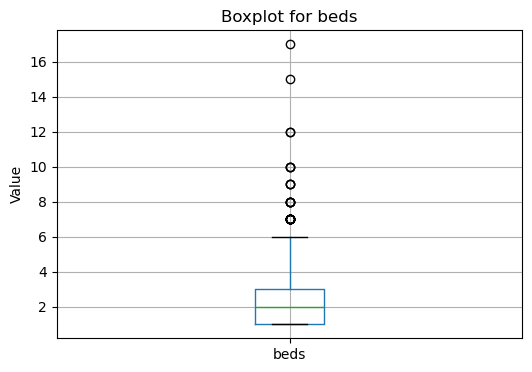

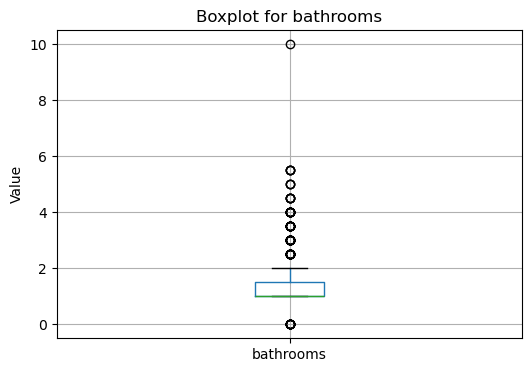

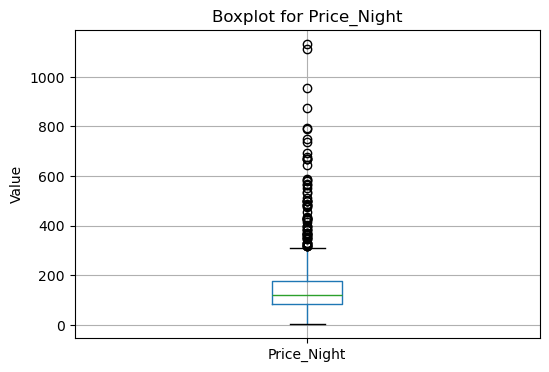

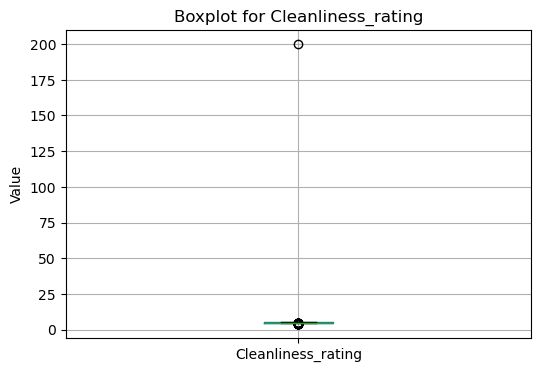

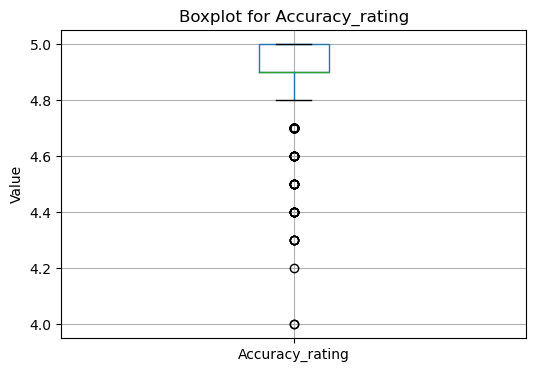

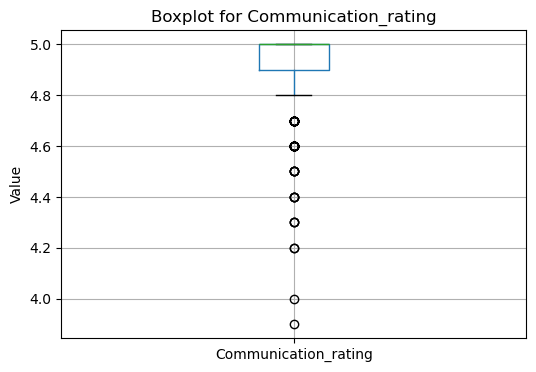

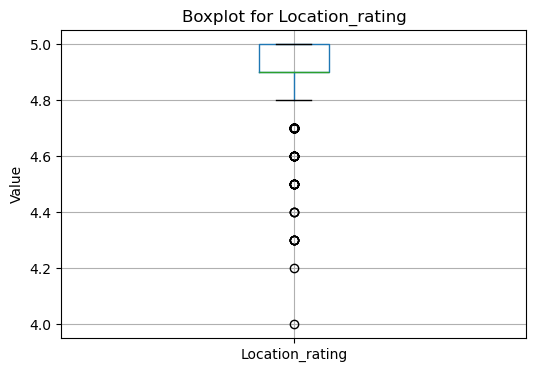

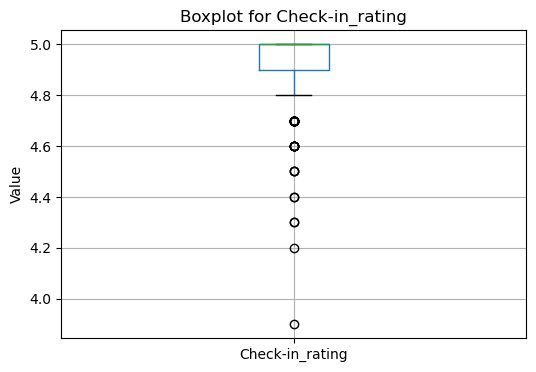

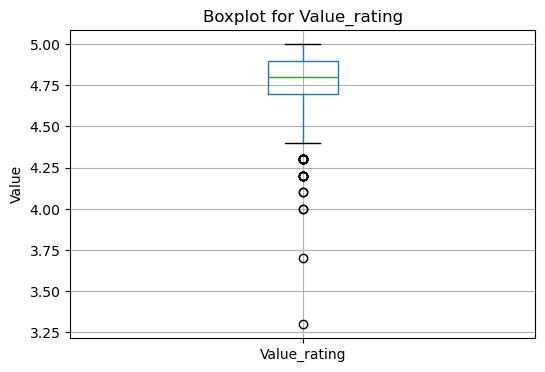

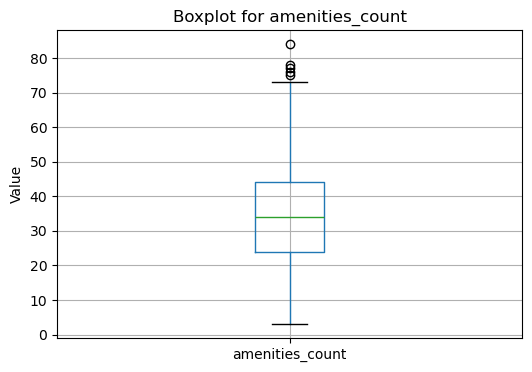

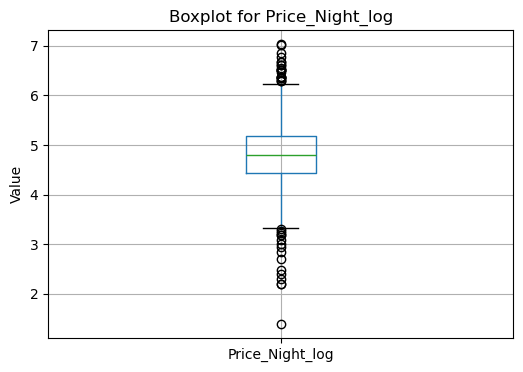

In [10]:
import matplotlib.pyplot as plt

# Loop through each column and create a separate boxplot
for column in numeric_data.columns:
    plt.figure(figsize=(6, 4))  # Adjust the size of each figure
    numeric_data.boxplot(column)
    plt.title(f'Boxplot for {column}')
    plt.ylabel('Value')
    plt.show()


## Observations from boxplots
- Price per night has many outliers and a large range, with a right skew
- Amenities count is close to symmetrical
- All of the ratings columns have left skew and a very narrow IQR. This low variability will likely limit the predictive capability of these columns individually on price